# Bagging

- Bootstrap Aggregating
- 중복을 허용한 랜덤 샘플링으로 만들어진 훈련 데이터로 모델 학습
- 분류기에 어떤 모델을 쓸지 결정 가능
- n_estimators: 몇 개의 분류기를 만들 것인지
- max_samples: bootstrap sample 크기

bagging에 linear_model(LogisticRegression 적용)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm,ym,stratify=ym, random_state=42)

cancer= load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state=0)


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=1, random_state=42)
# oob score=True란 bootstrapping에 포함되지 않은 샘플을 기반으로 훈련 모델을 평가하는 것
bagging.fit(Xc_train, yc_train)

C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='warn', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=True,
                  random_state=42, verbo

In [3]:
print("train set score:{:.3f}".format(bagging.score(Xc_train,yc_train)))
print("test set score:{:.3f}".format(bagging.score(Xc_test,yc_test)))
print("OOB sample score:{:.3f}".format(bagging.oob_score_))

train set score:0.962
test set score:0.958
OOB sample score:0.948


bagging에 decision Tree 적용

In [5]:
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, n_jobs=2, random_state=42)
bagging.fit(Xm_train, ym_train)

print("train set score:{:.3f}".format(bagging.score(Xm_train,ym_train)))
print("test set score:{:.3f}".format(bagging.score(Xm_test,ym_test)))

train set score:0.987
test set score:0.880


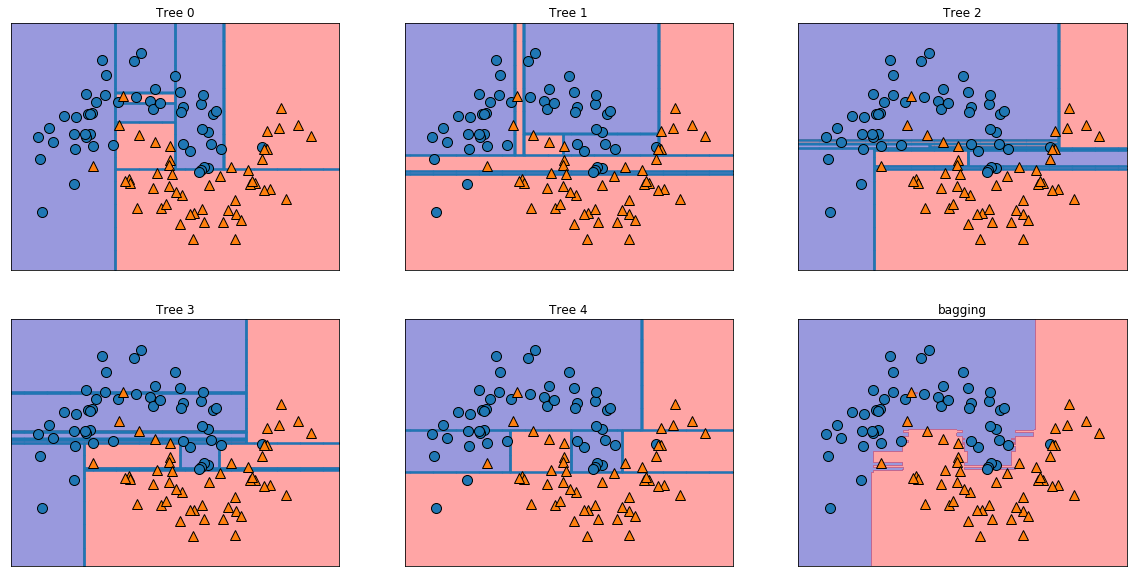

In [12]:
import mglearn
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(bagging, Xm, fill=True, ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1],ym)
plt.show()

# Extra Tree

- 후보 특성을 무작위로 분할.
- 분할된 것 중에서 최적의 분할을 찾는 것.

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5, n_jobs=1, random_state=0)
xtree.fit(Xm_train,ym_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

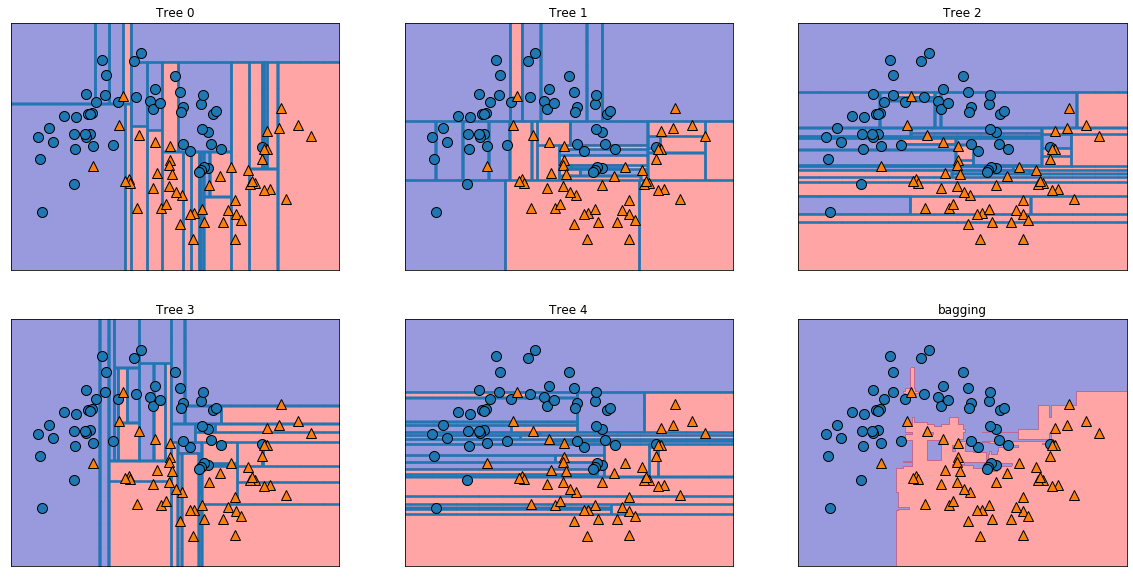

In [17]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), xtree.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(xtree, Xm, fill=True, ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1],ym)
plt.show()

# AdaBoost(Adaptive Boosting)

- 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련.
- 훈련된 각 모델은 성능에 따라 가중치가 부여됨.
- 예측을 할 때는 모델이 예측한 레이블을 기준으로 모델 가중치를 합산하여 가장 높은 레이블 선택

In [19]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5, random_state=42)
#AdaBoostClassifier의 max_depth는 default=1
ada.fit(Xm_train, ym_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=5, random_state=42)

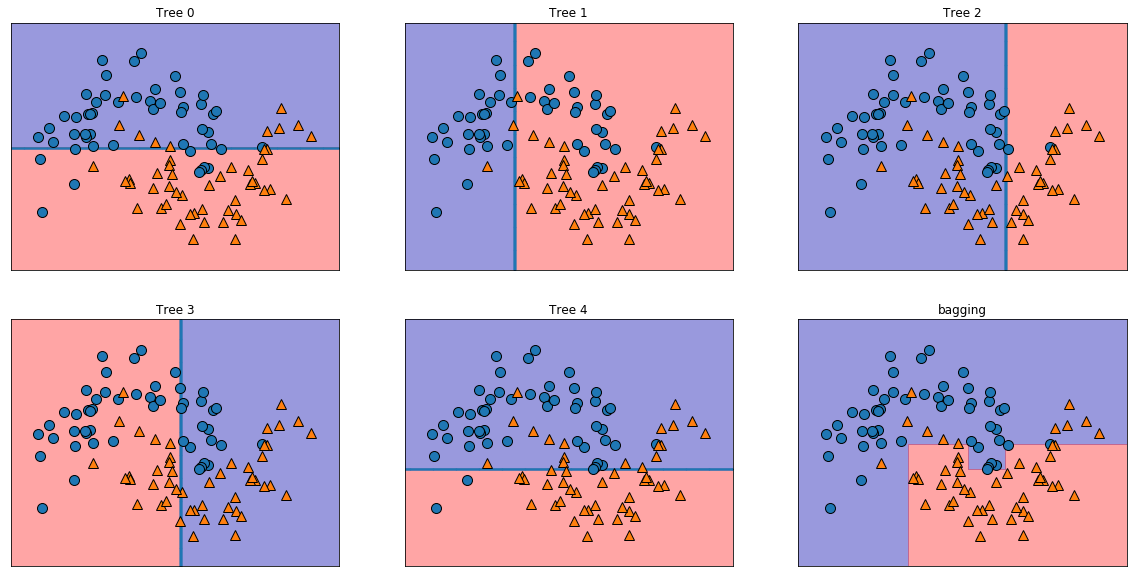

In [20]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), ada.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(Xm,ym, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(ada, Xm, fill=True, ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title("bagging")
mglearn.discrete_scatter(Xm[:,0], Xm[:,1],ym)
plt.show()